In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [12]:
# Load the dataset
# Assuming you have the dataset named 'Mall_Customers.csv' in your working directory
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')


In [13]:
# Show the first few rows of the dataset
print(df.head())

# Data Overview
print(df.info())

# Descriptive statistics
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [14]:
# 1. Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:")
print(missing_data)

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Unique values in 'Gender':
['Male' 'Female']



<ipython-input-18-1332eb453d2d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


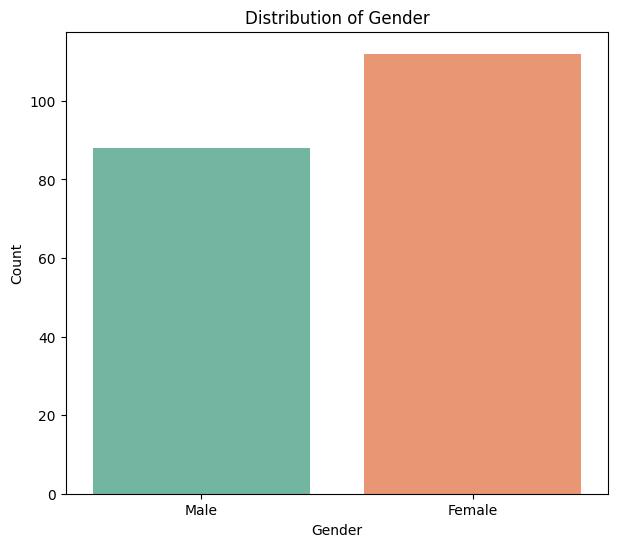

In [18]:
# 1. Define categorical columns
# We are assuming that 'Gender' is categorical, and if other categorical features exist, they can be added here.
categorical_columns = ['Gender']  # Add more columns here if needed (e.g., 'Region', 'Occupation')

# 2. Check unique values for each categorical column and visualize
for col in categorical_columns:
    if col in df.columns:  # Check if the column exists in the dataset
        # Print unique values
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        print()  # Blank line for better readability

        # 3. Visualize the distribution of unique values using a count plot
        plt.figure(figsize=(7, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")

In [19]:
# Data Cleaning: Encoding categorical variables
# Gender is a categorical column, let's encode it into numerical values (Male = 0, Female = 1)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

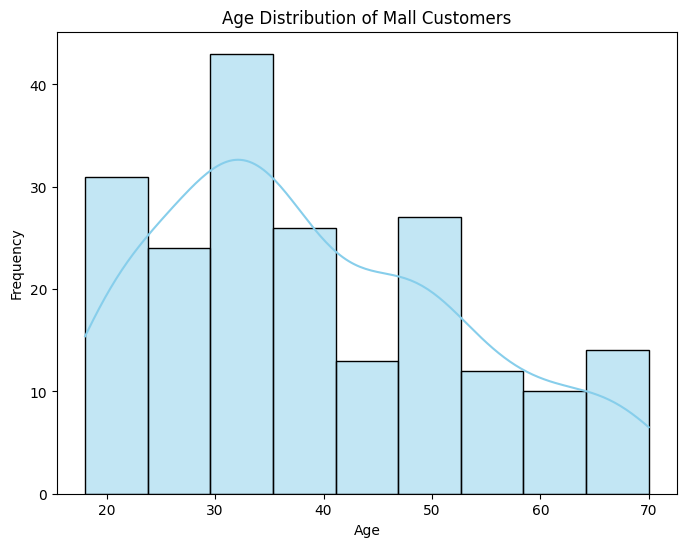

In [20]:
# Visualizing the distribution of the key features

# 1. Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

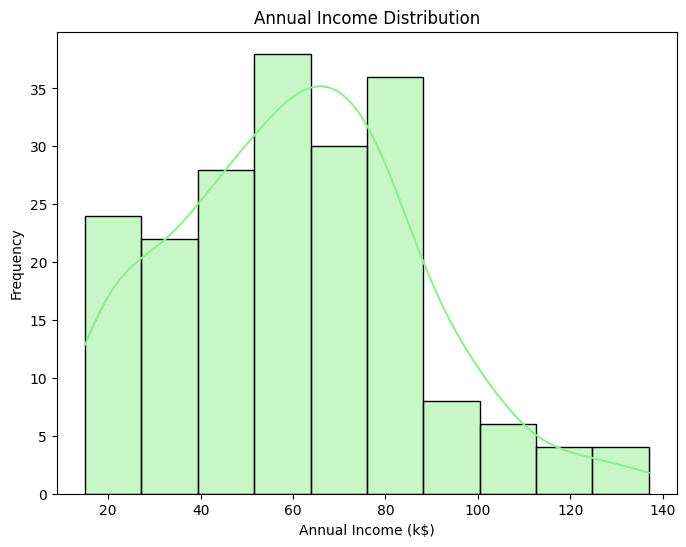

In [5]:
# 2. Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, color='lightgreen')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

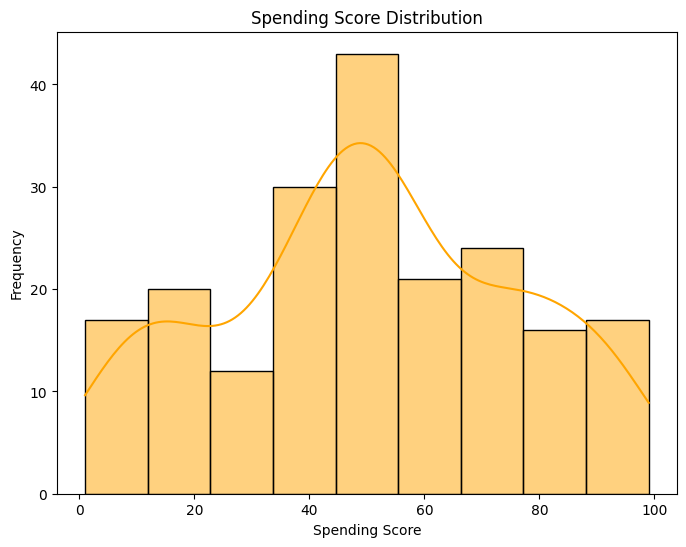

In [6]:
# 3. Spending Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='orange')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-1b8d81d5512f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')


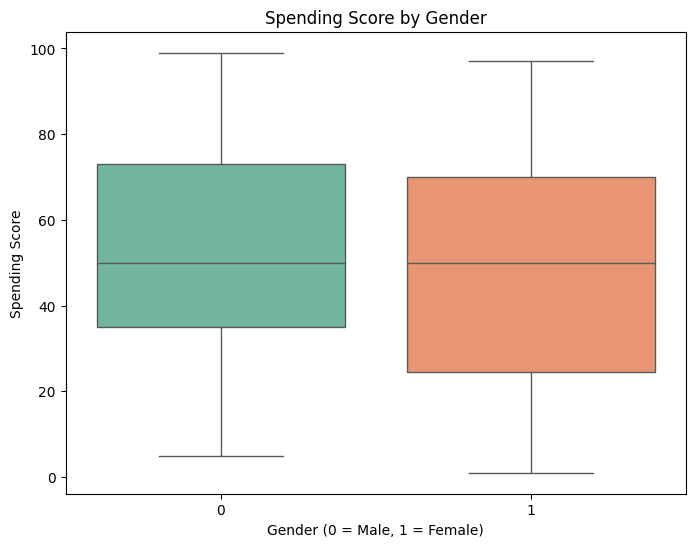

In [7]:
# Boxplot of Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Spending Score')
plt.show()

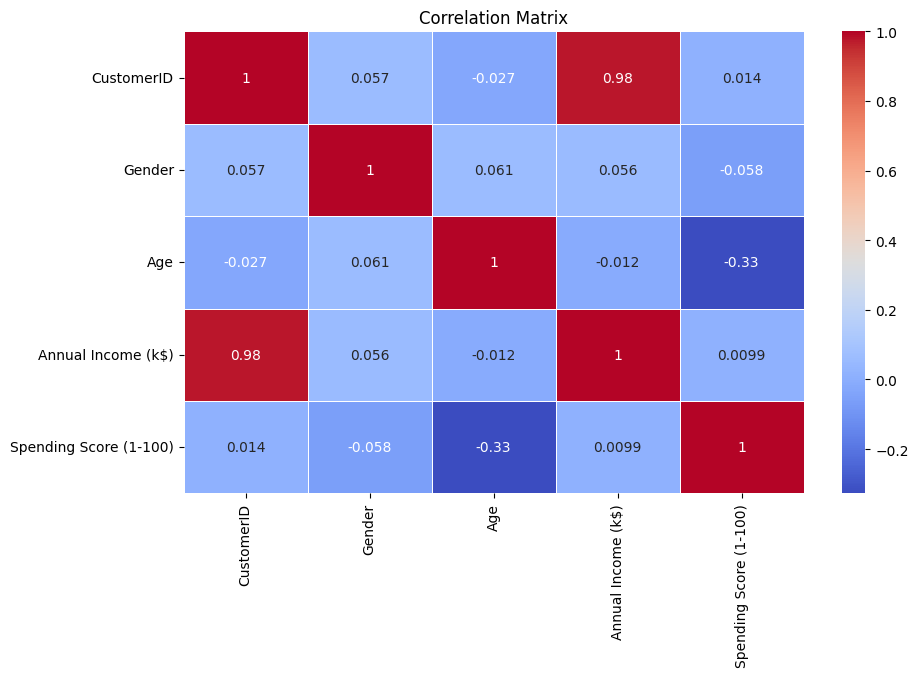

In [8]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# K-means Clustering
# We will use Annual Income and Spending Score for clustering

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

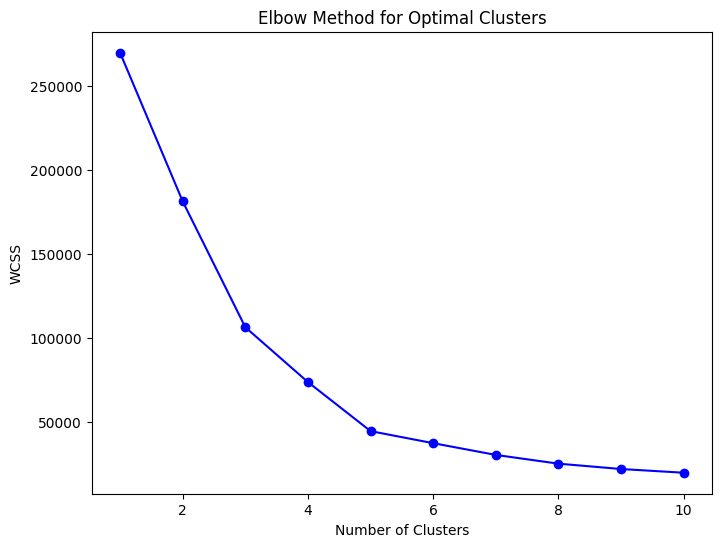

In [10]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

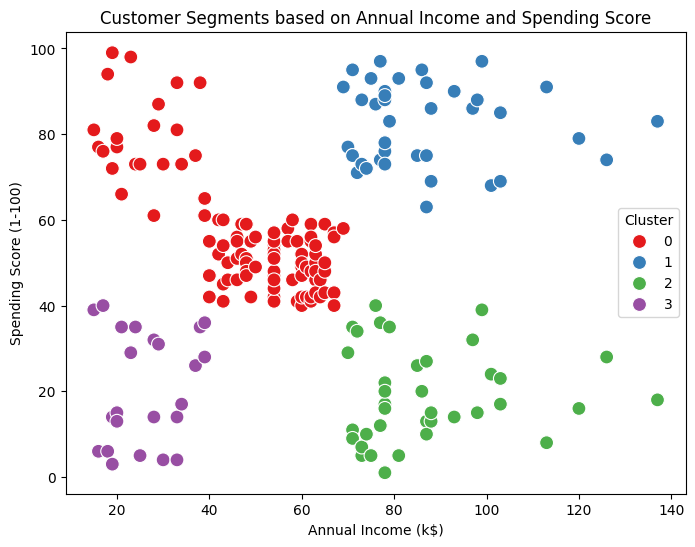

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        39.200000           48.260000               56.480000
1        32.692308           86.538462               82.128205
2        40.394737           87.000000               18.631579
3        45.217391           26.304348               20.913043


In [11]:
# From the Elbow method, we will assume 4 clusters as optimal.
# Fit the K-means model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Summary of clusters
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())